---

# EIM-E990 | Computer Vision II

## 2. Assignment

Prof. Dr. Mirco Fuchs, HTWK Leipzig

---

Ziel des Assignments ist die Überprüfung der Invarianz des Doppelverhältnisses gegenüber perspektivischer Abbildung (projektiver Transformation)

1. Implementieren Sie eine Funktion zur Berechnung des Doppelverhältnisses aus 4 co-linearen Punkten.
2. Laden Sie verschiedene Bilder einer Kanu-Szene und bestimmen Sie das Doppelverhältnis co-linearer Punkte (Bojen) in Fahrtrichtung.
    - Wählen Sie in den Bildern jeweils vergleichbare 4 co-lineare Punkte aus und bestimmen Sie ihr  Doppelverhältnis.
    - Modellieren Sie die zu den co-linearen Bildpunkten korrespondierenden Weltpunkte mithilfe der vorgegebenen Szenengeometrie und bestimmen Sie ebenfalls deren Doppelverhältnis.
3. Wiederholen Sie Teilaufgabe 2 für co-lineare Punkte quer (90° in der Szene) zur Fahrtrichtung.
4. [Optional] Vergleichen Sie die Ergebnisse der Teilaufgaben 2 und 3. Lässt sich eine allgemeine Aussage für den Sonderfall 4 co-linearer Punkte mit gleich langen Liniensegmenten formulieren oder sogar herleiten?

## Hilfsfunktion zum Einlesen und Anzeigen der Bilder
Führen Sie die nachfolgenden Zellen aus, um das jeweils vorgegebene Bild und die zugehörigen Bojenpositionen zu laden. Tauschen Sie also dementsprechend nur die Pfade zum jeweligen Bild und den zugehörigen Bojen aus.

### Funktion zum Einlesen der Bojenpositionen

In [11]:
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np

# Funktion zum Einlesen der txt-Datei und Parsen der Koordinaten
def read_coordinates(file_path):
    coordinates = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.strip():  # Überprüfung, ob die Zeile nicht leer ist
                # Entfernen von Klammern und Trennen nach Komma
                line = line.strip().replace('(', '').replace(')', '')
                x, y = map(float, line.split(','))
                coordinates.append((x, y))
    return coordinates

### Einlesen der Bilder und Bojenpositionen

In [63]:
# Bilddatei und txt-Datei einlesen
image_path = "./img/middle_c0009_frame_3200.png" # Ersetze durch den Pfad zum Bild
txt_path = "./img/middle_c0009_frame_3200_bojen.txt"  # Ersetze durch den Pfad zur txt-Datei
#image_path = "./img/c0009_frame_2100.png"  # Ersetze durch den Pfad zum Bild
#txt_path = "./img/c0009_frame_2100_bojen.txt"  # Ersetze durch den Pfad zur txt-Datei

# Bild laden
image = imread(image_path)

# Koordinaten einlesen
coords = read_coordinates(txt_path)

# Convert coords to homogeneous coordinates
buoys = np.array(coords)
buoys = np.hstack((buoys, np.ones((buoys.shape[0], 1))))

### Anzeige des eingelesenen Bildes und der Bojenpositionen

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

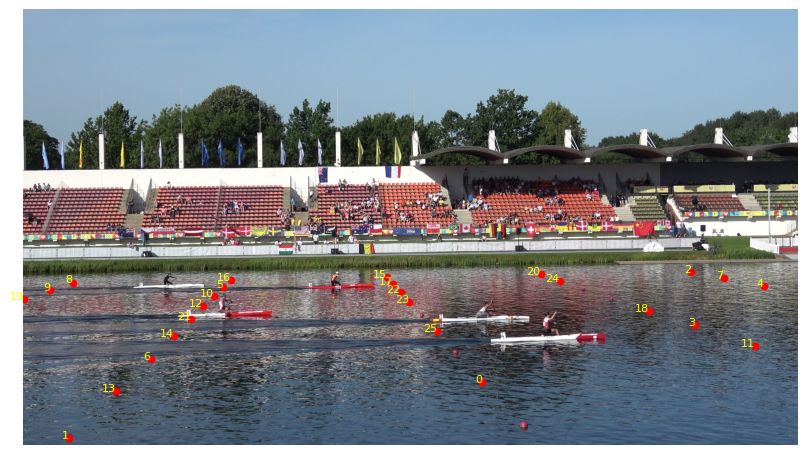

In [64]:
def draw_fig(image, coords):

    # Bild und Punkte darstellen
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.imshow(image, cmap='gray')  # Zeigt das Bild an, hier im Graustufenformat
    plt.axis('off')  # Entfernt die Achsen

    # Punkte und Beschriftungen hinzufügen
    for idx, (x, y) in enumerate(coords):
        plt.scatter(x, y, color='red', s=20)  # Punkte in Rot darstellen
        plt.text(x, y, str(idx), color='yellow', fontsize=8, ha='right')  # Index als Beschriftung

    #plt.show()
    return fig, ax

draw_fig(image, coords)

## Teilaufgabe 1: Berechnung des Doppelverhältnis aus 4 co-linearen Punkten
Implementieren Sie eine Funktion, die für 4 Bildpunkte $\mathbf{p}_i=\begin{pmatrix}x_i \\ y_i \\ 1\end{pmatrix}$ oder 4 Weltpunkte $\mathbf{P}_i=\begin{pmatrix}X_i \\ Y_i \\ Z_i \\ 1\end{pmatrix}$ das folgende Doppelverhältnis berechnet:

![](img/cross_ratio.png)

In [18]:
# in: colinear_points ... list of 4 points
# out: cross ratio of given points
def calc_cross_ratio(colinear_points):
    
    
    import numpy as np

# in: colinear_points ... list of 4 points 
# out: cross ratio of given points
def calc_cross_ratio(colinear_points):
    # Erwartet Liste mit genau 4 Punkten
    if len(colinear_points) != 4:
        raise ValueError("colinear_points muss genau 4 Punkte enthalten.")

    # Punkte in numpy-Arrays umwandeln
    p1, p2, p3, p4 = [np.array(p, dtype=float) for p in colinear_points]

    # Hilfsfunktion: euklidische Distanz zwischen zwei Punkten
    def dist(a, b):
        return np.linalg.norm(a - b)

    # Zähler und Nenner gemäß Formel
    numerator   = dist(p3, p1) * dist(p4, p2)
    denominator = dist(p3, p2) * dist(p4, p1)

    return numerator / denominator

## Aufgabe 2: Berechnung des Doppelverhältnisses für Bojen ENTLANG der Fahrrichtung
### ... mithilfe des Bildes `middle_c0009_frame_3200.png`
- Laden Sie das angegebene Bild und die zugehörigen Bojenpositionen (Ausführen der Zellen weiter oben mit den angepassten Pfadangaben).
- Wählen Sie 4 co-lineare Bojen ENLANG Fahrtrichtung aus dem Array `buoys` und ermitteln Sie für diese mit der von Ihnen in Teilaufgabe 1 entwickelten Funktion das Doppelverhältnis.

In [34]:
colinear_points = [buoys[20], buoys[24], buoys[18], buoys[3]]

In [35]:
cross_ratio = calc_cross_ratio(colinear_points)

In [36]:
print(cross_ratio)

1.480749995090739


### ... mithilfe des Bildes `c0009_frame_2100.png`

In [37]:
colinear_points = [buoys[39], buoys[48], buoys[40], buoys[26]]

In [38]:
cross_ratio = calc_cross_ratio(colinear_points)
print(cross_ratio)

1.3207545323414251


### ... mithilfe der Szenengeometrie
Die Weltkoordinaten der Bojen folgen einer bekannten Geometrie. Bojen entlang der Fahrrichtung haben einen Abstand von je 12.5m. Bojen quer zur Fahrrichtung (sie definieren die einzelnen Fahrrinnen) haben einen Abstand von je 9m. 
Definieren Sie mithilfe dieser Szenengeometrie die __homogenen__ Weltkoordinaten derjenigen Bojen, die Sie in einem der beiden Bilder ausgewählt haben. Richten Sie das dabei verwendete Koordinatensystem am besten zur Fahrrichtung aus (d.h. x-Richtung entlang Fahrrichtung, y-Richtung quer). Berechnen Sie für die von Ihnen modellierten 4 co-linearen Punkte das Doppelverhältnis.

Da sich alle Weltpunkte in der selben Z-Ebene befinden, müssen die Z-Koordinaten nicht definiert werden. Außerdem definieren wir Punkte entlang einer Linie, wobei das Koordinatensystem zur Fahrtrichtung ausgereichtet ist. Somit ist für Linien entlang der Fahrtrichtung die y-Koordinate ebenfalls identisch und muss nicht definiert werden. Testen Sie dies gern, indem Sie für die Weltpunkte x-, y- und z-Koordinaten definieren.

In [39]:
scene_points = [
    [0, 0],
    [12.5, 0],
    [25, 0],
    [37.5, 0]
]



In [40]:
cross_ratio = calc_cross_ratio(scene_points)
print(cross_ratio)

1.3333333333333333


In [ ]:
## Aufgabe 3: Berechnung des Doppelverhältnisses für Bojen QUER zur Fahrrichtung
### ... mithilfe des Bildes `middle_c0009_frame_3200.png`
- Laden Sie das angegebene Bild und die zugehörigen Bojenpositionen (Ausführen der Zellen weiter oben mit den angepassten Pfadangaben).
- Wählen Sie 4 co-lineare Bojen QUER zur Fahrrichtung aus dem Array `buoys` und ermitteln Sie für diese mit der von Ihnen in Teilaufgabe 1 entwickelten Funktion das Doppelverhältnis.

In [65]:
colinear_points = [buoys[5], buoys[17], buoys[24], buoys[2]]

In [66]:
cross_ratio = calc_cross_ratio(colinear_points)

In [67]:
print(cross_ratio)

1.2856562105633824


### ... mithilfe der Szenengeometrie
Die Weltkoordinaten der Bojen folgen einer bekannten Geometrie. Bojen entlang der Fahrrichtung haben einen Abstand von je 12.5m. Bojen quer zur Fahrrichtung (sie definieren die einzelnen Fahrrinnen) haben einen Abstand von je 9m. 
Definieren Sie mithilfe dieser Szenengeometrie die __homogenen__ Weltkoordinaten derjenigen Bojen, die Sie im obigen Bild ausgewählt haben. Richten Sie das dabei verwendete Koordinatensystem am besten zur Fahrrichtung aus (d.h. x-Richtung entlang Fahrrichtung, y-Richtung quer). Berechnen Sie für die von Ihnen modellierten 4 co-linearen Punkte das Doppelverhältnis.

Da sich alle Weltpunkte in der selben Z-Ebene befinden, müssen die Z-Koordinaten nicht definiert werden. Außerdem definieren wir Punkte entlang einer Linie, wobei das Koordinatensystem zur Fahrtrichtung ausgereichtet ist. Somit ist für Linien quer der Fahrtrichtung die x-Koordinate ebenfalls identisch und muss nicht definiert werden. Testen Sie dies gern, indem Sie für die Weltpunkte x-, y- und z-Koordinaten definieren.

### Doppelverhältnis quer Fahrtrichtung aus Szenenpunkten

In [68]:
scene_points = [
    [0, 0],
    [0, 9],
    [0, 18],
    [0, 27]
]

In [69]:
cross_ratio = calc_cross_ratio(scene_points)

In [70]:
print(cross_ratio)

1.3333333333333333


## [Optional] Aufgabe 4: Vergleich des Doppelverhältnisses der Teilaufgaben 2 und 3 für gleichlange Liniensegmente
Überprüfen Sie zunächst, ob die in den Teilaufgaben 2 und 3 von Ihnen ausgewählten Bojen jeweils unmittelbar hintereinander entlang einer Linie liegen, d.h. dass entlang einer Linie keine Boje ausgelassen wird. Die zugehörigen Liniensegmente in der Szene (Weltkoordinaten) sind in der Folge gleich lang. Sollte dies bei Ihnen nicht der Fall sein (was grundsätzlich kein Problem ist), dann versuchen Sie die Bojen in den Teilaufgaben noch einmal so auszuwählen, dass sie diesem Kriterium entsprechen.

**Was lässt sich bzgl. des Doppelverhältnisses beobachten, welches sich für 4 co-lineare Punkt ergibt, deren eingeschlossene Liniensegmente gleich lang sind?**

In [ ]:
Wenn vier kolineare Punkte gleichmäßig verteilt sind (alle Strecken gleich lang), ist das Doppelverhältnis konstant und beträgt 4/3 ≈ 1.33. 
Dieses Ergebnis bleibt unabhängig von der Perspektive erhalten und ist invariant unter projektiven Transformationen.

**Leiten Sie den beobachteten zusammenhang mithilfe der Formel her.**

In [ ]:
Für vier Punkte A, B, C, D mit gleichen Abständen gilt:
AB = BC = CD = d

Das Doppelverhältnis ist definiert als:
(AC / BC) : (AD / BD)

AC = 2d, BC = d, AD = 3d, BD = 2d

=> (2d / d) : (3d / 2d)
=> 2 : 1.5
=> 4/3

Damit ist gezeigt, dass das Doppelverhältnis für gleichlange Segmente immer 4/3 beträgt.